In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
xtr = np.array([1, 2])
ytr = np.array([300, 500])

In [15]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        y_hat = w*x[i] + b
        j = (y_hat - y[i])**2
        cost = cost + j
    cost = cost / (2*m)
    return cost

In [16]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = np.zeros(m)
    dj_db = np.zeros(m)
    for i in range(m):
        y_hat = w*x[i]+b
        dj_dw[i] = ((y_hat - y[i])*x[i]) / m
        dj_db[i] = (y_hat - y[i]) / m
    return np.sum(dj_dw), np.sum(dj_db)

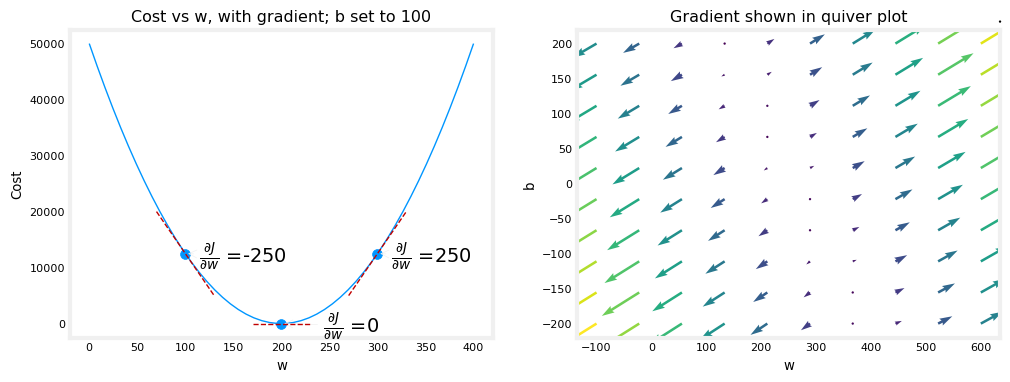

In [17]:
plt_gradients(xtr, ytr, compute_cost, compute_gradient)
plt.show()

In [33]:
def gradient_descent(x, y, w, b, alpha, iters, cost = compute_cost, gradient = compute_gradient):
    w_in = w
    b_in = b

    cost_history = []
    param_history = []
    
    for i in range(iters):
        dw, db = gradient(x, y, w_in, b_in)
        w_in = w_in - (alpha*dw)
        b_in = b_in - (alpha*db)

        if i < 100000:
            cost_history.append(cost(x, y, w_in, b_in))
            param_history.append([w_in, b_in])
        if i% math.ceil(iters/10)==0:
            print(
                f'Iteration = {i}',
                f'Cost = {cost_history[-1]}',
                f'Gradient = dw:{dw} db:{db}',
                f'Updated Parameters = w:{w_in} b{b_in}:'
            )

    return w_in, b_in, cost_history, param_history

In [54]:
w, b, history_cost, history_param = gradient_descent(xtr, ytr, 100, 100, 1.0e-2, 10000)

Iteration = 0 Cost = 11664.5625 Gradient = dw:-250.0 db:-150.0 Updated Parameters = w:102.5 b101.5:
Iteration = 1000 Cost = 23.389697888290435 Gradient = dw:-0.9718911637291967 db:1.5725529362788109 Updated Parameters = w:186.68683663904764 b121.54115081580052:
Iteration = 2000 Cost = 5.434583647718458 Gradient = dw:-0.46847720749690325 db:0.7580120446852732 Updated Parameters = w:193.58270367397571 b110.38340357138729:
Iteration = 3000 Cost = 1.2627225697873476 Gradient = dw:-0.2258183859830467 db:0.3653818238050519 Updated Parameters = w:196.9066936970973 b105.00507473571079:
Iteration = 4000 Cost = 0.29339290580603666 Gradient = dw:-0.10885042565976732 db:0.17612368840732984 Updated Parameters = w:198.50894467117357 b102.41257820114778:
Iteration = 5000 Cost = 0.06816968290335901 Gradient = dw:-0.05246877978845532 db:0.08489626904577108 Updated Parameters = w:199.28127195436943 b101.16292640649797:
Iteration = 6000 Cost = 0.015839188934635186 Gradient = dw:-0.025291337500902955 db:0

In [55]:
print(f"The updated W={w} , B={b} and the cost is {history_cost[-1]}")

The updated W=199.98128302395526 , B=100.03028470340706 and the cost is 4.6231018263022305e-05


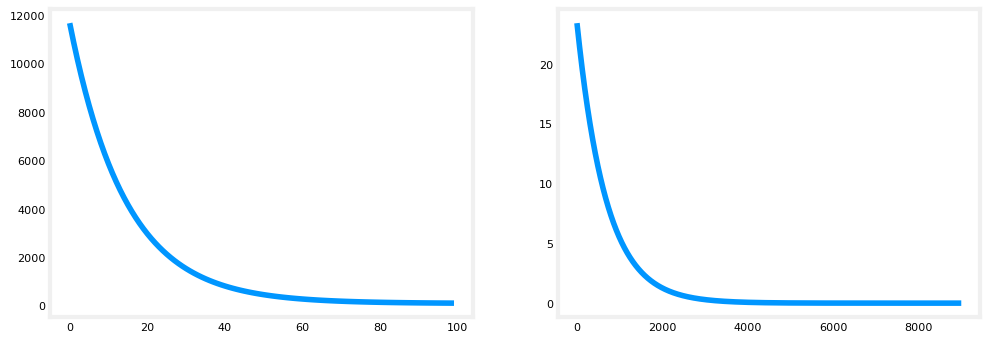

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(history_cost[:100])
ax2.plot(history_cost[1000:])
plt.show()